<a href="https://colab.research.google.com/github/oneway-net/scientific-python/blob/main/Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Announcement
1. Finish Assign 1 grading by the end of Friday
2. Extra Credits Opportunity: it's designed for those who didn't submit Assign1 or score < 70% for Assign 1. Same due day as Assign 2 with 2 free late days.

Rule: you have an opportunity to resubmit Assign 1 to Assign 1 Extra Credit on the Gradescope, but its max score will be 70% of Assign 1. Assign 1 score is released by the Friday, and you have a week to submit Assign 1 Extra Credit, ending at the due day of Assign 2 (Next Wed) + 2 free late days (Next Friday).

Eg: assume that you didn't submit Assign1, but you score 90% for Assign 1 Extra Credit and 100% for Assign 2. Then your total score is 90% * 70% * 0.5 + 100% * 0.5 = 81.5% (70% is the baseline to pass this course.)
3. No Make-up assignment for Assign 2, and do not send email for extra late days since everyone has 2 free late days.

# Lecture 7 - CME 193 - scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding numbers
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

Here is a [handy flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of when to use each technique.

![](https://scikit-learn.org/stable/_static/ml_map.png)

# Start of Basic Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Regression
Abalone are a type of edible marine snail, and they have internal rings that correspond to their age (like trees). We need to cut the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. In the following, we will use a dataset of [abalone measurements](https://archive.ics.uci.edu/ml/datasets/abalone). It has the following fields:

    Sex / nominal / -- / M, F, and I (infant) 
    Length / continuous / mm / Longest shell measurement 
    Diameter	/ continuous / mm / perpendicular to length 
    Height / continuous / mm / with meat in shell 
    Whole weight / continuous / grams / whole abalone 
    Shucked weight / continuous	/ grams / weight of meat 
    Viscera weight / continuous / grams / gut weight (after bleeding) 
    Shell weight / continuous / grams / after being dried 
    Rings / integer / -- / +1.5 gives the age in years 

Suppose we are interested in predicting the age of the abalone given their measurements. This is an example of a regression problem.

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                   header=None, names=['sex', 'length', 'diameter', 'height', 'weight', 'shucked_weight',
                                       'viscera_weight', 'shell_weight', 'rings'])

In [ ]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   weight          4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<Axes: ylabel='Frequency'>

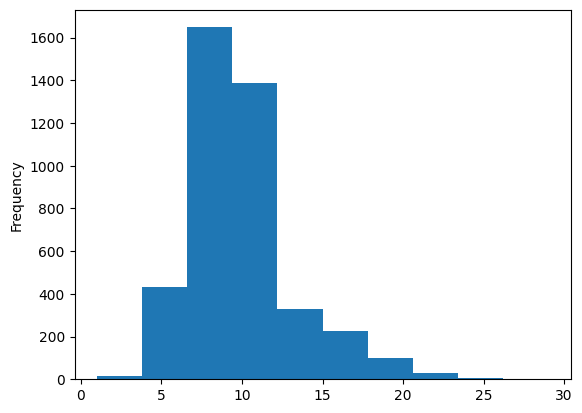

In [ ]:
# we have pd.pandas.plot as a convinient way to make some simple plot (just a wrapper on matplotlib plt.plot())
# refer back to the Optional section of lec 6 or https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

df['rings'].plot(kind='hist') #you can see the number of rings clustered around 6 ~ 11

<Axes: xlabel='weight', ylabel='rings'>

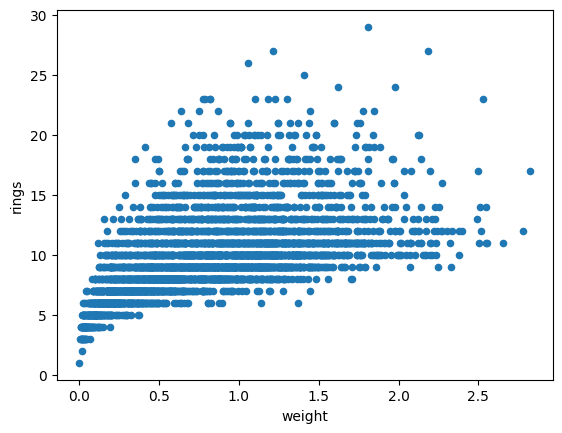

In [ ]:
df.plot('weight', 'rings', kind='scatter') # we can see some trend here

### Four steps of ML
0. get the data
1. import the model
2. train the model
3. use the model to predict

In [ ]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
#0. create data
X = df[['weight']].to_numpy() #data as 2D input array
y = df['rings'].to_numpy() #data to output 1D array to predict

In [ ]:
X.shape # we expect the input data for linear regression model to be 2D

(4177, 1)

In [ ]:
X

array([[0.514 ],
       [0.2255],
       [0.677 ],
       ...,
       [1.176 ],
       [1.0945],
       [1.9485]])

In [ ]:
y.shape

(4177,)

In [ ]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [ ]:
?LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
#1.we create a raw linearRegression model
model = LinearRegression() # Stats203

#2. we takes the model, train it with the dataset
model.fit(X, y) 

# For y = A@X + B, all variables and parameters here are matrix, 
# we return optmized coefficient A and intercept B here
print(model.coef_, model.intercept_) 

[3.55290921] 6.989238807755703


In [ ]:

#3. make a prediction 
test_data = np.array([[1.5], [2.2]])
model.predict(test_data) #make two predictions when X is 1.5 or 2.2, what are y?

array([12.31860263, 14.80563908])

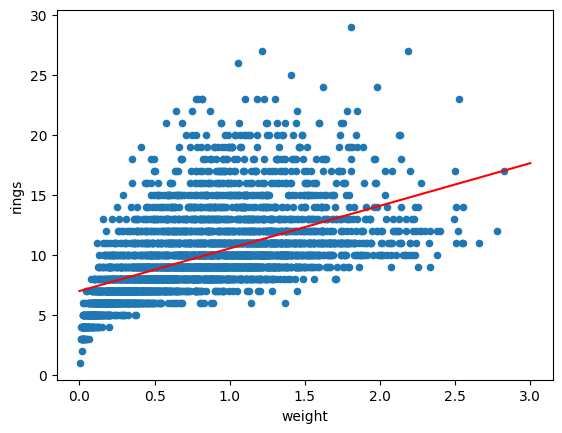

In [ ]:
df.plot('weight', 'rings', kind='scatter')

weight = np.linspace(0, 3, 10).reshape(-1, 1)
plt.plot(weight, model.predict(weight), 'r') # y = 3.55 @ X + 6.99

In [ ]:
print(model.score(X, y)) 
# return the R^2 coefficient = How much %data variance can be explained by the model -> STATS 203

0.29202100292591804


This looks ok but it does not do a great job. It looks like $rings = const*\sqrt(weights)$, let's try that

In [ ]:
 # let's create a new column of root of weight
df['root_weight'] = np.sqrt(df['weight'])

In [ ]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings,root_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.716938
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.474868
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.822800
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.718331
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.452769


In [ ]:
X = df[['weight','root_weight']].to_numpy()
y = df['rings'].to_numpy()
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
X.shape, y.shape

((4177, 2), (4177,))

In [ ]:
model.coef_ 
# The first coefficient is for `weight`, and second coef is for `root_weight`

array([-3.57798188, 12.36414363])

In [ ]:
# How .predict function works under the hood?

print("Calculate by for formula y = A@X + b: ",model.coef_ @ X[1,:] + model.intercept_) #Ax + b

print("Result of .predict() function: ", model.predict(X[1,:].reshape(1,-1))[0]) #Expected 2D array

Calculate by for formula y = A@X + b:  7.2907223338045135
Result of .predict() function:  7.2907223338045135


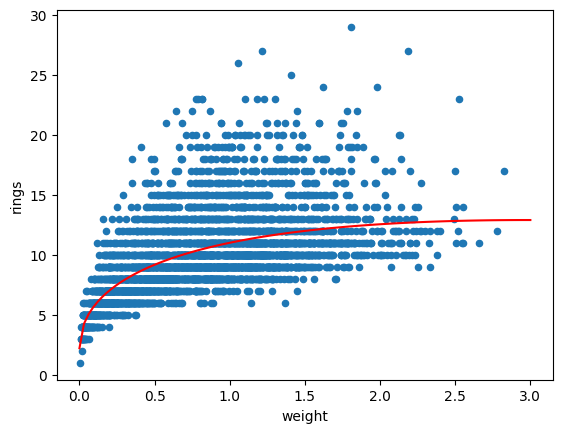

In [ ]:
weight = np.linspace(0, 3, 100).reshape(-1, 1)
root_weight = np.sqrt(weight)
features = np.hstack((weight,root_weight))
df.plot('weight', 'rings', kind='scatter')
plt.plot(weight, model.predict(features), 'r')

In [ ]:
model.score(X,y) # we get improvement from  R^2  = 0.29

0.34587406410396204

As we can see above, the density of points near the red line is much higher than the region where rings > 20. To visualize the density attribute, we use heatmap (2d histogram) to bucketize the counts within a 2d square.

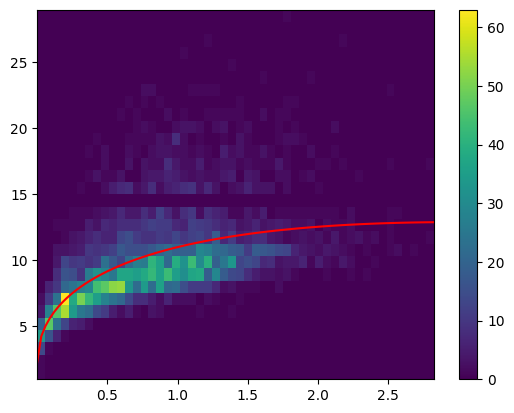

In [ ]:
plt.hist2d(df['weight'],df['rings'],bins=(50,30));
plt.plot(weight, model.predict(features), 'r')
plt.colorbar()

# End of Basic Section

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data[:, :2] #sepal
y = iris.target_names[iris.target]

In [ ]:
print(X.shape)
X[:10]

(150, 2)


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [ ]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

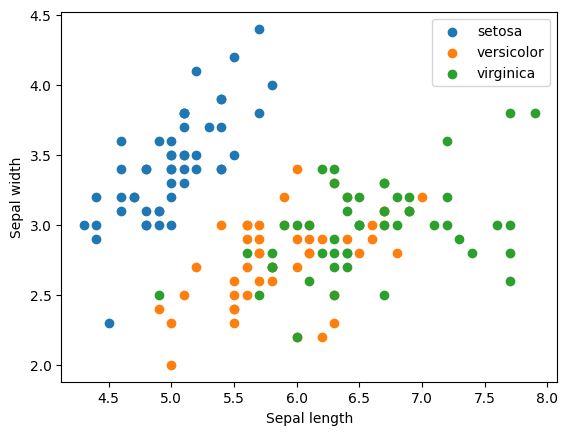

In [ ]:
# We plot the graph with attribute width and length, distinguished color by its class
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend();

In [ ]:
# split our data sets into training and testing sets
# Training set: used to train the model
# Testing set: used to valid performance of the trained model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#use the intuition that a point is checking its neiborghts 
# (if all neibors blue → the point is likely to be blue)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)
y_predict

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [ ]:
y_test

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

## Evaluating your model in a more elegant way

In [ ]:
y_predict == y_test

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
print(np.mean(y_predict == y_test))  # Accuracy

0.8666666666666667


In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_predict, y_test)

0.8666666666666667

 More comprehensive score  

 - Precision: fraction of relevant instances among the retrieved instances,  

- Recall:    fraction of relevant instances that were retrieved  

- F1-score: 2*(Precision * Recall)/(Precision+Recall): quantify the performance of model (max 1.0, higher -> better)

In [ ]:
print(metrics.classification_report(y_predict, y_test))

#eg: virginica precision = 0.67, to predict sample of 1000 of mixed flower, 
# if we predict 100 flowers are virginica, we will be 67% correct, 
# virginica recall = 0.33 -> however, we only extracted 33% of the virginica,
# which we predict another 67% of true virginica as something else

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.69      1.00      0.82         9
   virginica       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.91      0.87      0.86        30



In [ ]:
# Cross validation:
# Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalization.

# By default, split data into 5 chucks, train the model 5 times by holding one each chuck used for validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.73333333, 0.76666667, 0.76666667, 0.86666667, 0.7       ])

In [ ]:
print(f"Precision: {scores.mean()} (+/- {scores.std()})")

Precision: 0.7666666666666666 (+/- 0.05577733510227173)


### How can we do better? Use More / Different data

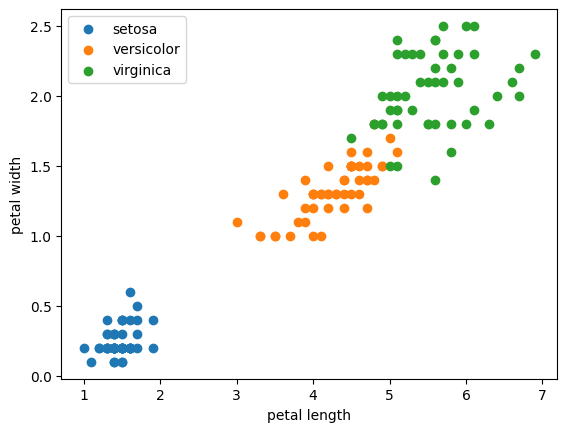

In [ ]:
X = iris.data[:, 2:]
y = iris.target_names[iris.target]

for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend();

# It does a much better job than Sepal

In [ ]:
X = iris.data
y = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

#Looks good, but what's downside of it?

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### More Advanced Topic -> Keyword: feature engineering, Regularization


# Exercise (Post Lecture)
Try to fit some of the models in the following cell to the same data. Compute the relevant statistics (e.g. accuracy, precision, recall). Look up the documentation for the classifier, and see if the classifier takes any parameters. How does changing the parameter affect the result?

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# # 0.Get data
# X = iris.data
# y = iris.target_names[iris.target]
# # Split the model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # 1. Get Model
# model = <YOUR MODEL FUNCTION>()

# # 2. Train model
# model.fit(X_train, y_train)

# # 3. Make Prediction
# print(metrics.classification_report(model.predict(X_test), y_test))

## Clustering

Clustering is useful if we don't have a dataset labelled (unsupervised classification) with the categories we want to predict, but we nevertheless expect there to be a certain number of categories. For example, suppose we have the previous dataset, but we are missing the labels. We can use a clustering algorithm like k-means to *cluster* the datapoints. Because we don't have labels, clustering is what is called an **unsupervised learning** algorithm.

In [ ]:
X = iris.data

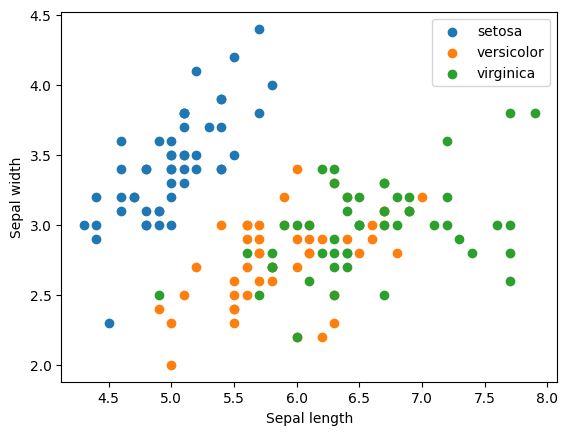

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [ ]:
X[ : , 0]

array([5.1, 4.9])

In [ ]:
X

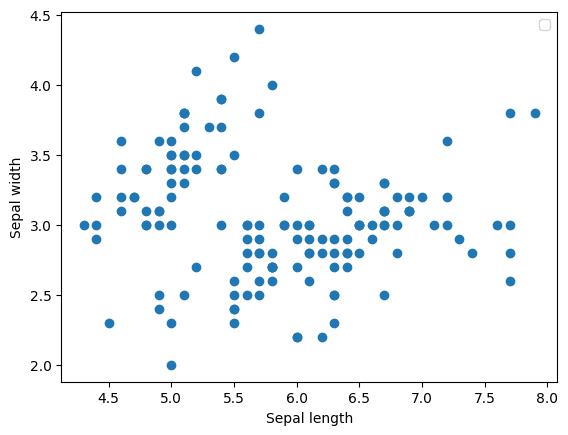

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# We initilized three starting points, adjusting them to an optimized solution
# The k-means algorithm assumes the data is generated by a mixture of Gaussians
model = KMeans(n_clusters=3, random_state=0) 
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
# give all flows in the data a label
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# The target labels looks different (which is fine) with similar trend
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

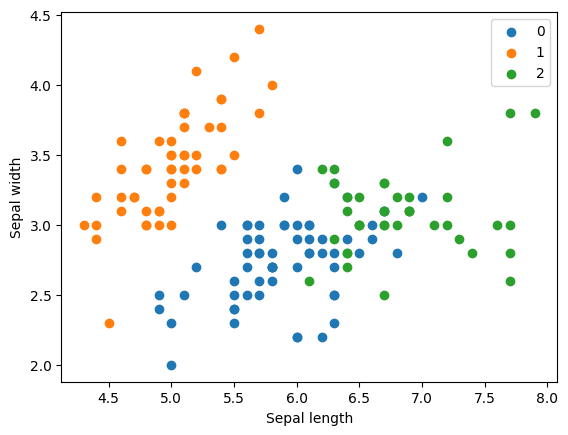

In [ ]:
# See it visually sepal
for name in [0,1,2]:
    plt.scatter(X[model.labels_ == name, 0], X[model.labels_ == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

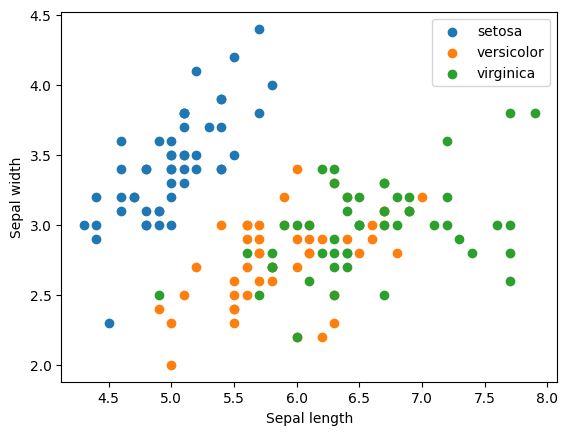

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

### More Advanced Topic: How to choosing the appropriate Number of Cluster ? [Elbow Method] ; Are there more metrics for evaluation? -> CS229

### Exercise (Post Lecture)

Load the breast cancer dataset. 

- Try to cluster it into two clusters and check if the clusters match with the target class from the dataset, which specifies if its malignant or not. Here we are testing if we can we idenitify if its malignant or benign without even looking at the target class i.e. using unsupervised learning.

- Next, train a supervised classifier, a `KNeighborsClassifier`, and see how much improvement we get?

In [ ]:
X.shape

In [ ]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
print(bc.DESCR)

In [ ]:
# # Unsupervised
# unsupervised = KMeans(n_clusters=2, random_state=0) 
# unsupervised.fit(X)
# score = sum(unsupervised.predict(X) == y)/y.shape[0]
# print(f"Unsupervised score: {score}, or {1-score}") # WHY?

In [ ]:
# # Supervised
# supervised = KNeighborsClassifier()
# supervised.fit(X, y)
# print(metrics.classification_report(supervised.predict(X), y))

## Dimensionality reduction

Dimensionality reduction is another unsupervised learning problem (that is, it does not require labels). It aims to project datapoints into a lower dimensional space while preserving distances between datapoints.

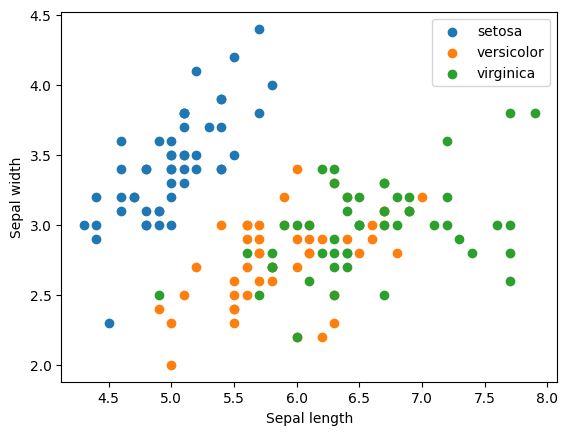

In [ ]:
X = iris.data[:, :]
y = iris.target_names[iris.target]

for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

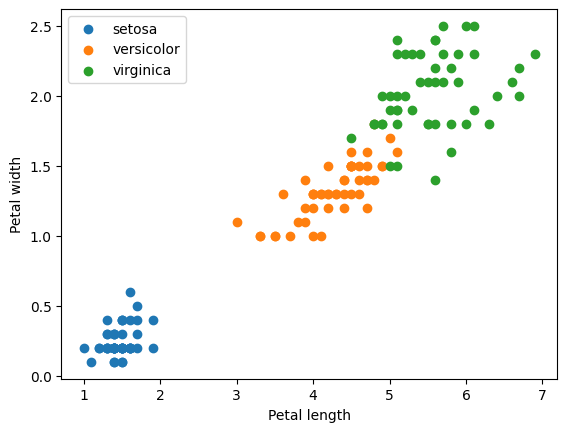

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 2], X[y == name, 3], label=name)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

We are going to use an algorithm callsed [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

T-distributed Stochastic Neighbor Embedding: a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the cost function of divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data `from sklearn.decomposition import PCA`) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X)

In [ ]:
# we convert the data into 2-dim with preserved features 
print(X.shape, X_transformed.shape)

(150, 4) (150, 2)


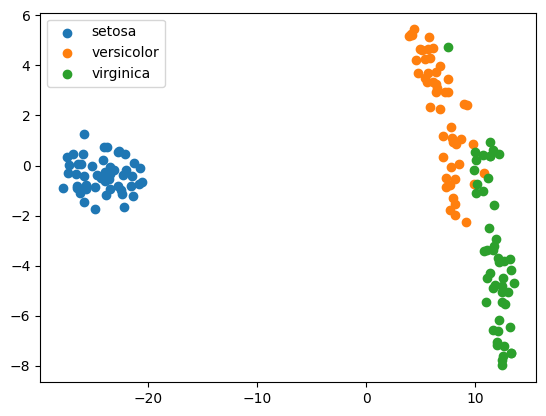

In [ ]:
for name in iris.target_names:
    plt.scatter(X_transformed[y == name, 0], X_transformed[y == name, 1], label=name)
    
plt.legend()

Lets take a look at the breast cancer dataset with dimensionality reduction

In [ ]:
bc = datasets.load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X = bc.data
y = bc.target_names[bc.target]
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X)

In [ ]:
# we convert the data into 2-dim with preserved features 
print(X.shape, X_transformed.shape)

(569, 30) (569, 2)


In [ ]:
# bc.keys()

In [ ]:
# If we used full model of 30 attributes
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

(569, 30)
              precision    recall  f1-score   support

      benign       0.94      0.95      0.95        66
   malignant       0.94      0.92      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
# We use the 2-d dataset -> we get 92% accuracy -> still very good
print(X_transformed.shape)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

(569, 2)
              precision    recall  f1-score   support

      benign       0.91      0.95      0.93        64
   malignant       0.94      0.88      0.91        50

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
# visualize the reduced dimension data
for name in bc.target_names:
    plt.scatter(X_transformed[y == name, 0], X_transformed[y == name, 1], label=name)
    
plt.legend()

In [ ]:
# visualize the predicted reduced dimension data
ypred = model.predict(X_transformed)
for name in bc.target_names:
    plt.scatter(X_transformed[ypred == name, 0], X_transformed[ypred == name, 1], label=name)
    
plt.legend()